# **Desafio de Análise de Dados: "O que influencia o desempenho acadêmico dos estudantes?"**


**Contexto**: Você é uma cientista de dados contratada por uma universidade interessada em entender quais fatores do cotidiano dos alunos estão mais relacionados ao desempenho nas provas finais. A instituição deseja usar esses insights para desenvolver políticas de apoio estudantil.

# 1. Análise Exploratória dos Dados (EDA)

### a) Qual a distribuição de notas (exam_score) entre os alunos?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/student_habits_performance.csv')

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
print(df['exam_score'].describe())

count    1000.000000
mean       69.601500
std        16.888564
min        18.400000
25%        58.475000
50%        70.500000
75%        81.325000
max       100.000000
Name: exam_score, dtype: float64


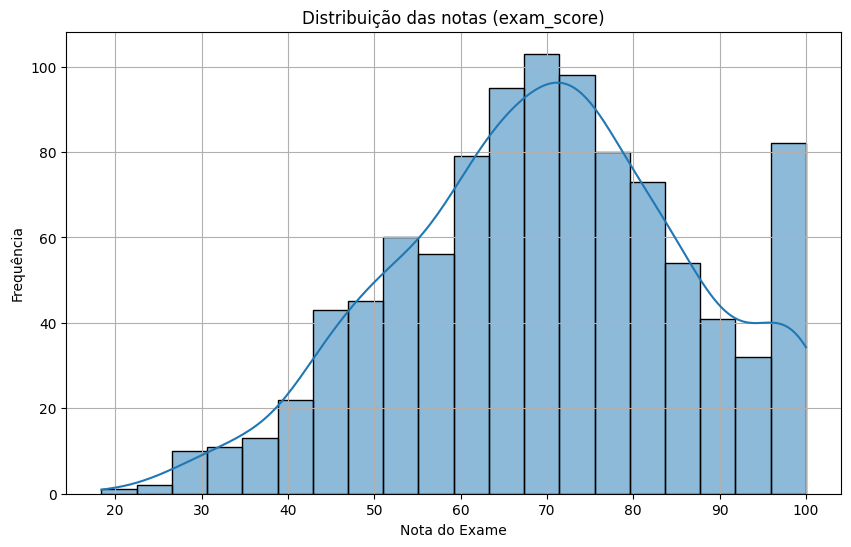

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title('Distribuição das notas (exam_score)')
plt.xlabel('Nota do Exame')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### b) Há diferença de desempenho entre gêneros?

/tmp/ipython-input-32-4029269457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')


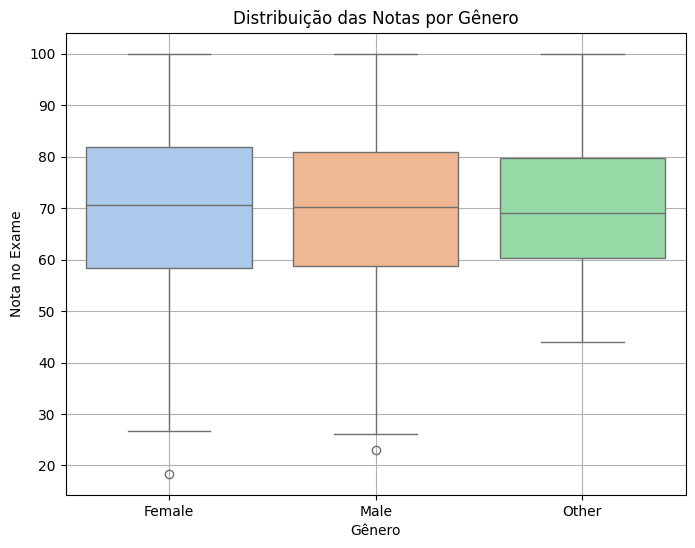

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')
plt.title('Distribuição das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota no Exame')
plt.grid(True)
plt.show()

In [ ]:
df.groupby('gender')['exam_score'].agg(['mean', 'std', 'count'])

,mean,std,count
gender,,,
Female,69.741372,16.899351,481
Male,69.368344,17.150875,477
Other,70.647619,13.755890,42


### c) Existe correlação entre horas de estudo e nota final? E entre horas em redes sociais/Netflix e nota?


In [ ]:
correlacoes = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'exam_score']].corr()
print(correlacoes['exam_score'].sort_values(ascending=False))

exam_score             1.000000
study_hours_per_day    0.825419
social_media_hours    -0.166733
netflix_hours         -0.171779
Name: exam_score, dtype: float64


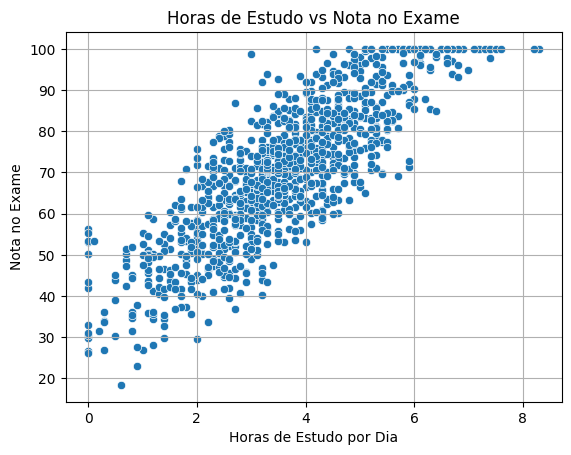

In [ ]:
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Horas de Estudo vs Nota no Exame')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota no Exame')
plt.grid(True)
plt.show()

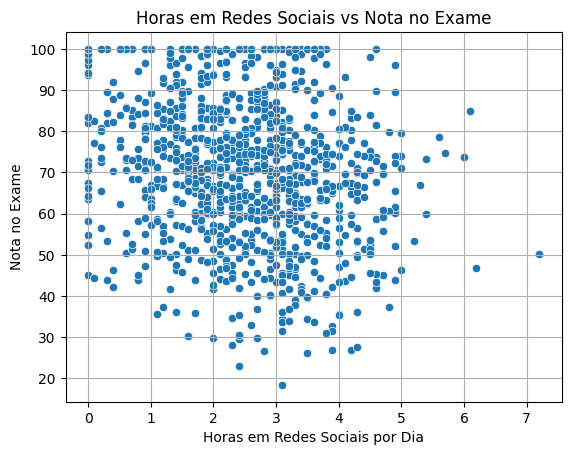

In [ ]:
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Horas em Redes Sociais vs Nota no Exame')
plt.xlabel('Horas em Redes Sociais por Dia')
plt.ylabel('Nota no Exame')
plt.grid(True)
plt.show()

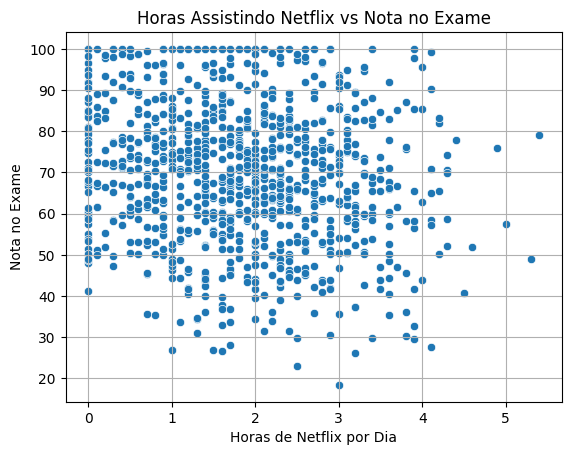

In [ ]:
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Horas Assistindo Netflix vs Nota no Exame')
plt.xlabel('Horas de Netflix por Dia')
plt.ylabel('Nota no Exame')
plt.grid(True)
plt.show()

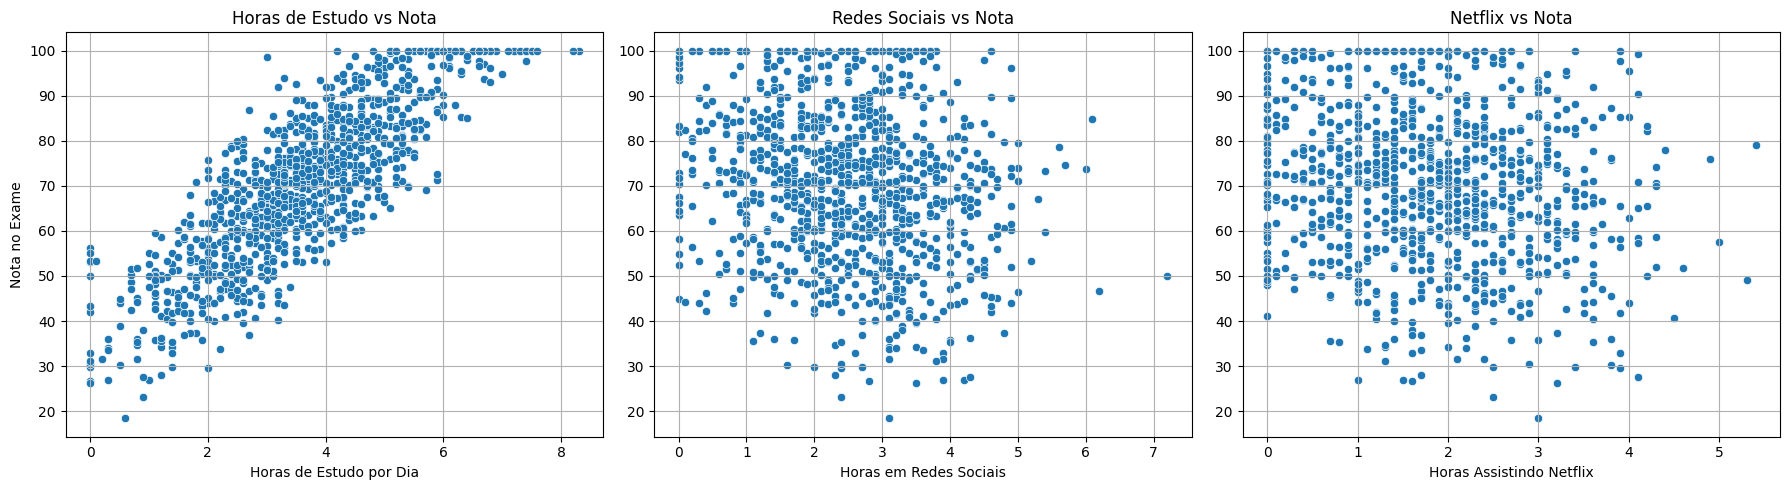

In [ ]:
# Tamanho da figura e estilo
plt.figure(figsize=(18, 5))  # Largura, altura

# 1. Horas de Estudo vs Nota
plt.subplot(1, 3, 1)
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Horas de Estudo vs Nota')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota no Exame')
plt.grid(True)

# 2. Redes Sociais vs Nota
plt.subplot(1, 3, 2)
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Redes Sociais vs Nota')
plt.xlabel('Horas em Redes Sociais')
plt.ylabel('')
plt.grid(True)

# 3. Netflix vs Nota
plt.subplot(1, 3, 3)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Netflix vs Nota')
plt.xlabel('Horas Assistindo Netflix')
plt.ylabel('')
plt.grid(True)

# Exibir os três gráficos juntos
plt.tight_layout()
plt.show()

1. Correlação entre study_hours_per_day e exam_score: 0.825
Força da correlação: Muito forte (acima de 0.8).

Sinal: Positivo → quanto mais horas o aluno estuda por dia, maior tende a ser sua nota no exame.

Interpretação: Existe uma forte relação positiva entre o tempo dedicado ao estudo e o desempenho. Isso sugere que estudar mais está fortemente associado a melhores notas.

2. Correlação entre social_media_hours e exam_score: -0.166
Força da correlação: Fraca.

Sinal: Negativo → quanto mais tempo gasto em redes sociais, ligeiramente menor tende a ser a nota.

Interpretação: Há uma fraca relação negativa, o que indica que passar mais tempo em redes sociais pode estar modestamente associado a notas um pouco mais baixas, mas o efeito não é muito forte.



3. Correlação entre netflix_hours e exam_score: -0.172
Força da correlação: Fraca.

Sinal: Negativo.

Interpretação: Assim como redes sociais, há uma fraca correlação negativa — ou seja, assistir mais Netflix pode estar levemente relacionado a piores notas, mas o impacto não é expressivo por si só.

### d) Como a variável saúde mental está impactando a nota final dos alunos.

In [ ]:
correlacao = df['mental_health_rating'].corr(df['exam_score'])
print(f"Correlação entre saúde mental e nota final: {correlacao:.2f}")


Correlação entre saúde mental e nota final: 0.32


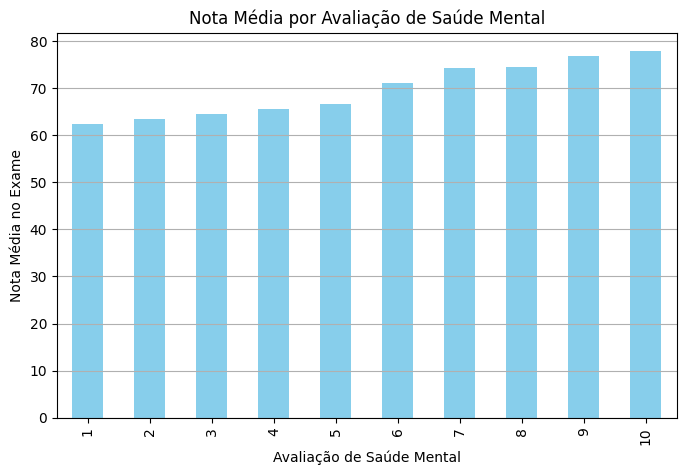

In [ ]:
df.groupby('mental_health_rating')['exam_score'].mean().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Nota Média por Avaliação de Saúde Mental')
plt.xlabel('Avaliação de Saúde Mental')
plt.ylabel('Nota Média no Exame')
plt.grid(axis='y')
plt.show()

# 2. Investigação de Correlações e Tendências

### a) Quais hábitos têm maior correlação com alto desempenho (nota ≥ 85)?

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


🧠 Correlação dos hábitos com alto desempenho (≥ 85):

study_hours_per_day      0.580659
mental_health_rating     0.236202
exercise_frequency       0.127824
sleep_hours              0.091918
attendance_percentage    0.087191
age                      0.000417
netflix_hours           -0.095042
social_media_hours      -0.099015
Name: Alto_Desempenho, dtype: float64


/tmp/ipython-input-18-1916713488.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')


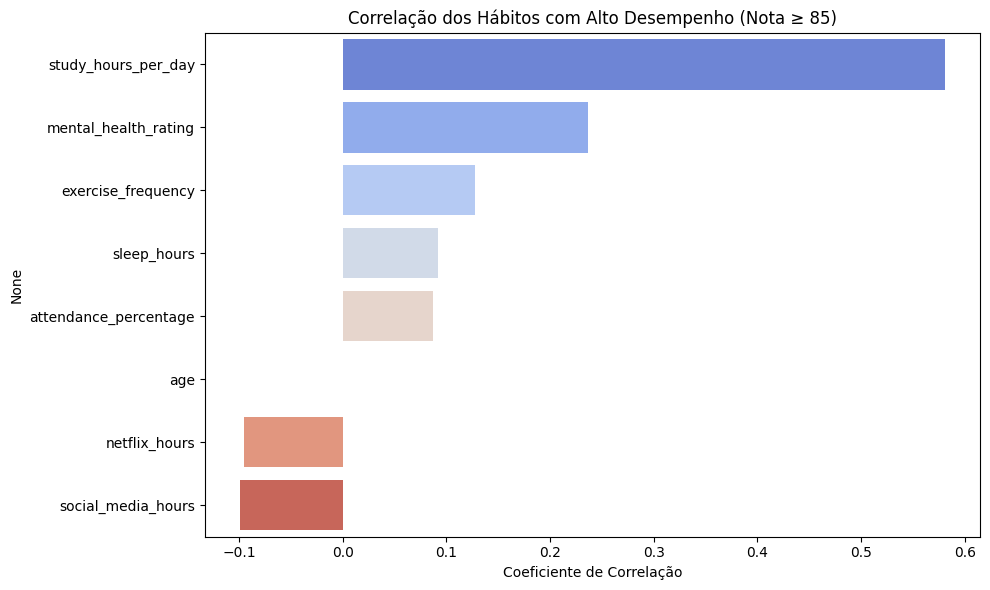

In [ ]:

# 3. Criar coluna de alto desempenho (nota >= 85)
df['Alto_Desempenho'] = df['exam_score'] >= 85

# 4. Converter coluna booleana para inteiro (True = 1, False = 0)
df['Alto_Desempenho'] = df['Alto_Desempenho'].astype(int)

# 5. Selecionar apenas colunas numéricas (excluindo 'Nota' se necessário)
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['exam_score'], errors='ignore')

# 6. Calcular correlação com alto desempenho
correlacoes = colunas_numericas.corr()['Alto_Desempenho'].drop('Alto_Desempenho').sort_values(ascending=False)

# 7. Exibir as correlações
print("\n🧠 Correlação dos hábitos com alto desempenho (≥ 85):\n")
print(correlacoes)

# 8. Visualização com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')
plt.title('Correlação dos Hábitos com Alto Desempenho (Nota ≥ 85)')
plt.xlabel('Coeficiente de Correlação')
plt.tight_layout()
plt.show()

### b) Como o nível de educação dos pais influencia a nota?

Níveis de educação dos pais:
['Master' 'High School' 'Bachelor' nan]

📊 Média de notas por nível de escolaridade dos pais:

parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64


/tmp/ipython-input-23-2927755054.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_educacao.values, y=media_por_educacao.index, palette='viridis')


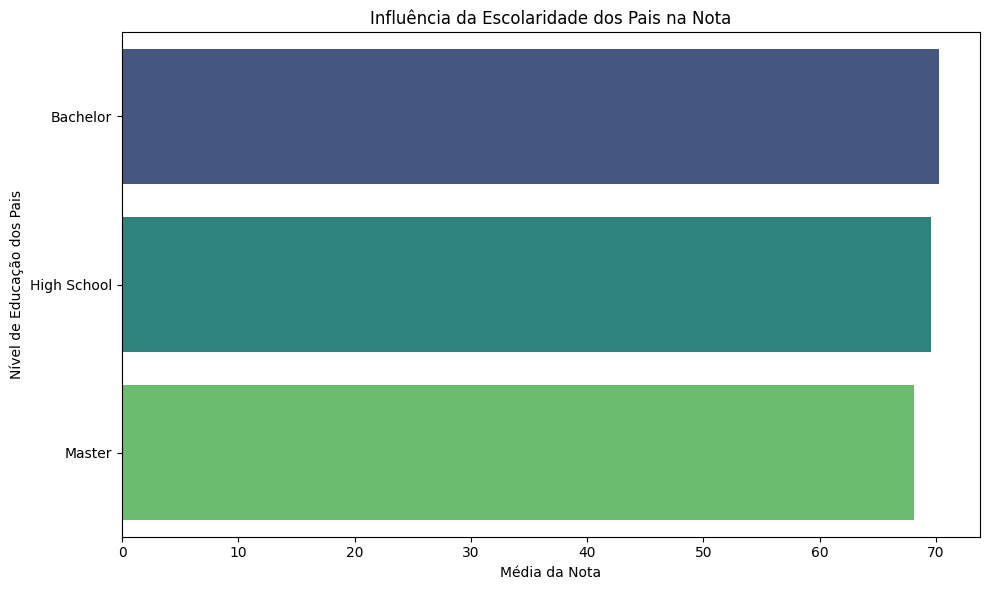


📈 Resultado do teste ANOVA: p-valor = 0.3901
→ Não há diferenças estatisticamente significativas entre os grupos.


In [ ]:

import matplotlib.pyplot as plt
from scipy.stats import f_oneway
# Verificar os valores únicos da coluna (ajuste o nome conforme necessário)
print("Níveis de educação dos pais:")
print(df['parental_education_level'].unique())

# Agrupar pela escolaridade dos pais e calcular média da nota
media_por_educacao = df.groupby('parental_education_level')['exam_score'].mean().sort_values(ascending=False)

print("\n📊 Média de notas por nível de escolaridade dos pais:\n")
print(media_por_educacao)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=media_por_educacao.values, y=media_por_educacao.index, palette='viridis')
plt.xlabel('Média da Nota')
plt.ylabel('Nível de Educação dos Pais')
plt.title('Influência da Escolaridade dos Pais na Nota')
plt.tight_layout()
plt.show()

# Teste ANOVA - diferença significativa entre os grupos?
grupos = [grupo['exam_score'].values for nome, grupo in df.groupby('parental_education_level')]
anova = f_oneway(*grupos)
print(f"\n📈 Resultado do teste ANOVA: p-valor = {anova.pvalue:.4f}")
if anova.pvalue < 0.05:
    print("→ Diferenças significativas entre os grupos de escolaridade dos pais.")
else:
    print("→ Não há diferenças estatisticamente significativas entre os grupos.")


In [ ]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167


In [ ]:
df.groupby('parental_education_level')['exam_score'].mean().sort_values(ascending=False)


,exam_score
parental_education_level,
Bachelor,70.272571
High School,69.547194
Master,68.086826


/tmp/ipython-input-63-887395393.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parental_education_level', y='exam_score', data=df, ci=None, order=df['parental_education_level'].value_counts().index)


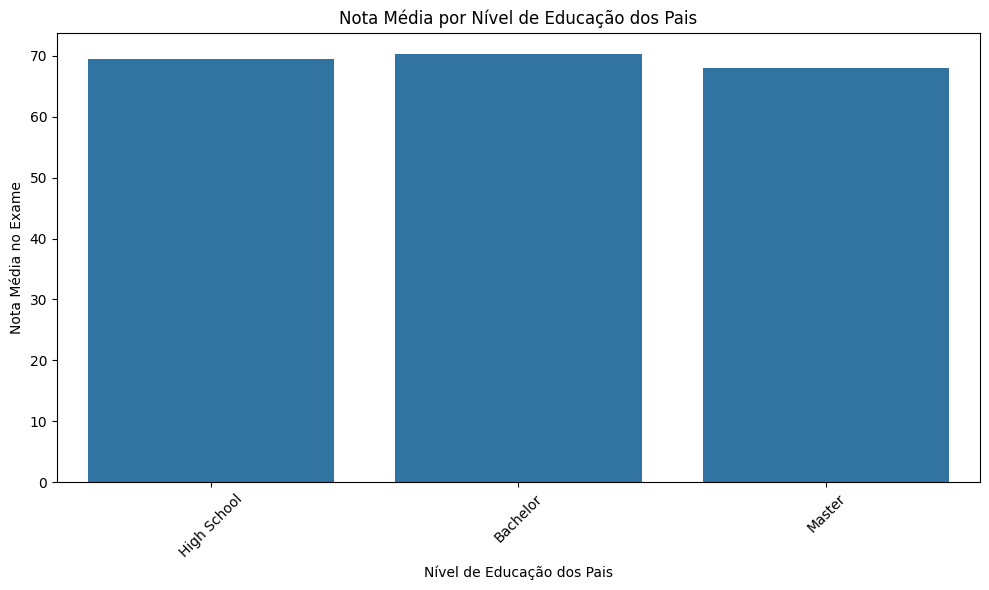

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='parental_education_level', y='exam_score', data=df, ci=None, order=df['parental_education_level'].value_counts().index)
plt.title('Nota Média por Nível de Educação dos Pais')
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Nota Média no Exame')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### c) Alunos com empregos de meio período têm desempenho diferente?

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

Valores possíveis: ['No' 'Yes']

🎯 Média da Nota por grupo (com/sem emprego):
 part_time_job
No     69.836561
Yes    68.743256
Name: exam_score, dtype: float64


/tmp/ipython-input-43-1234727791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='part_time_job', y='exam_score', palette='Set2')


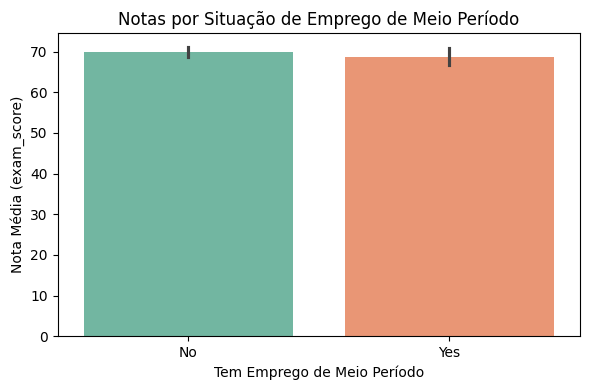


📊 Teste t de Student: p-valor = 0.4006
→ Não há diferença significativa nas notas entre os grupos.


In [ ]:
# Verificar os valores únicos
print("Valores possíveis:", df['part_time_job'].unique())

#  Calcular média das notas por grupo
media_por_grupo = df.groupby('part_time_job')['exam_score'].mean()
print("\nMédia da Nota por grupo (com/sem emprego):\n", media_por_grupo)

#  Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='part_time_job', y='exam_score', palette='Set2')
plt.title('Notas por Situação de Emprego de Meio Período')
plt.xlabel('Tem Emprego de Meio Período')
plt.ylabel('Nota Média (exam_score)')
plt.tight_layout()
plt.show()

# Teste t de Student
grupo_com_emprego = df[df['part_time_job'] == 'Yes']['exam_score']
grupo_sem_emprego = df[df['part_time_job'] == 'No']['exam_score']
t_stat, p_valor = ttest_ind(grupo_com_emprego, grupo_sem_emprego)

print(f"\n📊 Teste t de Student: p-valor = {p_valor:.4f}")
if p_valor < 0.05:
    print("→ Diferença significativa nas notas entre quem tem e quem não tem emprego.")
else:
    print("→ Não há diferença significativa nas notas entre os grupos.")


In [ ]:
df['part_time_job'].value_counts()

,count
part_time_job,
0,785
1,215


In [ ]:
df.groupby('part_time_job')['exam_score'].mean()


,exam_score
part_time_job,
0,69.836561
1,68.743256


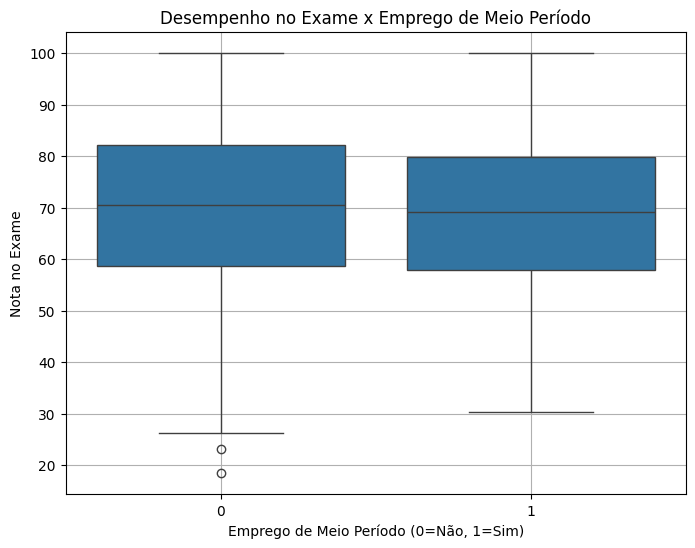

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='part_time_job', y='exam_score', data=df)
plt.title('Desempenho no Exame x Emprego de Meio Período')
plt.xlabel('Emprego de Meio Período (0=Não, 1=Sim)')
plt.ylabel('Nota no Exame')
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import ttest_ind

grupo_trabalha = df[df['part_time_job'] == 1]['exam_score']
grupo_nao_trabalha = df[df['part_time_job'] == 0]['exam_score']

t_stat, p_value = ttest_ind(grupo_trabalha, grupo_nao_trabalha, equal_var=False)
print(f"T-statística = {t_stat:.2f}, p-valor = {p_value:.4f}")


T-statística = -0.85, p-valor = 0.3946


O p-valor (0.3946) é bem maior que 0.05, o que indica que não há evidência estatística suficiente para afirmar que o desempenho (nota no exame) dos alunos com emprego de meio período é diferente do dos alunos sem emprego.

A t-estatística negativa sugere que a média dos alunos que trabalham é um pouco menor, mas essa diferença não é significativa estatisticamente.

alunos com emprego de meio período não apresentam diferença significativa no desempenho acadêmico em comparação com alunos que não trabalham.

# 3. Modelagem Preditiva Construa um modelo de regressão para prever a exam_score com base nas demais variáveis.
Avalie a importância de cada variável no modelo. Separe em variáveis que possuem impacto negativo e positivo no score do exame.

R² Regressão Linear: 0.897
R² Random Forest: 0.849

Coeficientes - Regressão Linear:
social_media_hours                     -2.687640
netflix_hours                          -2.315607
diet_quality_Good                      -0.971059
diet_quality_Poor                      -0.567759
parental_education_level_Master        -0.521722
parental_education_level_High School   -0.272107
internet_quality_Good                  -0.198685
extracurricular_participation_Yes      -0.112191
internet_quality_Poor                  -0.010850
age                                     0.050058
gender_Male                             0.134899
attendance_percentage                   0.142756
part_time_job_Yes                       0.369667
gender_Other                            0.746440
exercise_frequency                      1.318297
mental_health_rating                    1.955663
sleep_hours                             1.980160
study_hours_per_day                     9.529012
dtype: float64

Top 10 Importânci

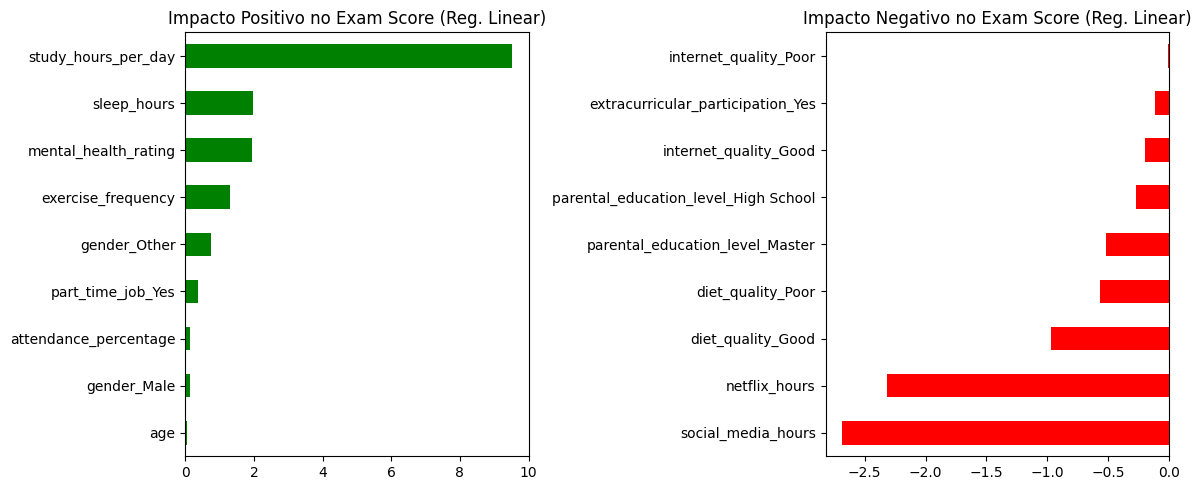

/tmp/ipython-input-4-301893315.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf.head(10), y=importances_rf.head(10).index, palette='viridis')


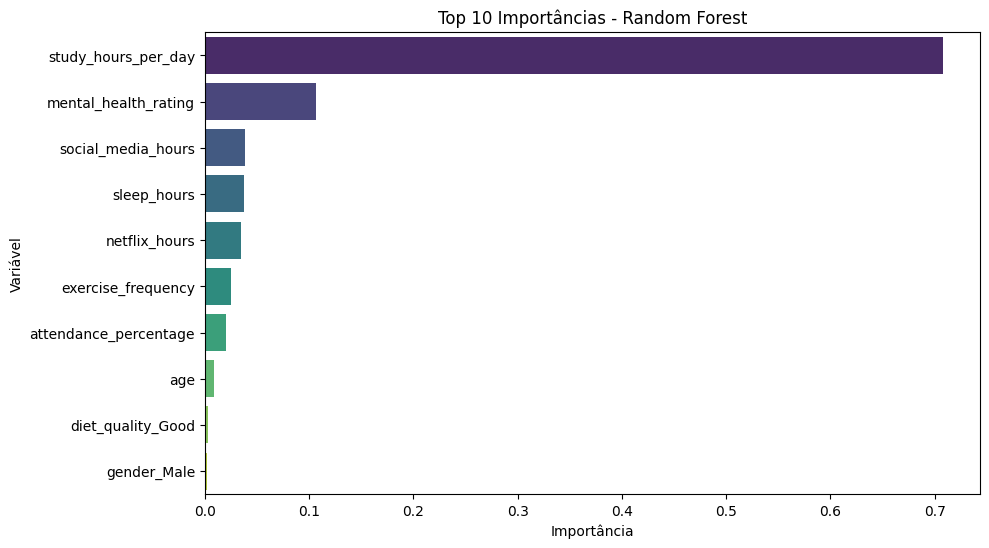

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===  Pré-processamento ===
# Remover coluna que não contribui para o modelo
df_model = df.drop(columns=["student_id"])

# Codificar variáveis categóricas com get_dummies
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Separar variável alvo e preditoras
X = df_encoded.drop(columns=["exam_score"])
y = df_encoded["exam_score"]

# ===  Separar em treino e teste ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===  Treinar modelos ===
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# ===  Avaliação dos modelos ===
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² Regressão Linear: {r2_lr:.3f}")
print(f"R² Random Forest: {r2_rf:.3f}")

# === Importância das variáveis ===

# Regressão Linear: coeficientes
coef_lr = pd.Series(lr_model.coef_, index=X.columns).sort_values()
print("\nCoeficientes - Regressão Linear:")
print(coef_lr)

# Separar impacto positivo e negativo
coef_positivo = coef_lr[coef_lr > 0]
coef_negativo = coef_lr[coef_lr < 0]

# Random Forest: importância
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Importâncias - Random Forest:")
print(importances_rf.head(10))

# ===  Visualização ===

# Gráfico dos coeficientes positivos e negativos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
coef_positivo.plot(kind='barh', color='green')
plt.title('Impacto Positivo no Exam Score (Reg. Linear)')

plt.subplot(1, 2, 2)
coef_negativo.plot(kind='barh', color='red')
plt.title('Impacto Negativo no Exam Score (Reg. Linear)')
plt.tight_layout()
plt.show()

# Gráfico da importância das variáveis no Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf.head(10), y=importances_rf.head(10).index, palette='viridis')
plt.title("Top 10 Importâncias - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

# 4. Recomendações Com base nas análises, sugira pelo menos 3 ações práticas que a universidade pode implementar para melhorar o desempenho acadêmico dos alunos.

**Criar Programas de Acompanhamento e Planejamento de Estudos**

Justificativa: A variável com maior impacto positivo foi study_hours_per_day, com coeficiente +9.53.

Ação sugerida:

Implementar mentorias acadêmicas ou grupos de estudo assistidos por monitores.

Oferecer oficinas de planejamento de tempo e técnicas de estudo eficazes.

Criar metas personalizadas de estudo por curso ou matéria.



**Promover Hábitos de Sono Saudáveis e Saúde Mental**

Justificativa:

sleep_hours (+1.98) e mental_health_rating (+1.96) influenciam fortemente o desempenho.

Ação sugerida:

Parcerias com especialistas para oferecer palestras sobre sono, ansiedade e bem-estar.

Disponibilizar sessões com psicólogos ou terapeutas estudantis.

Criar campanhas educativas sobre higiene do sono e equilíbrio emocional.

**Educar sobre o Uso Consciente de Redes Sociais e Streaming**

Justificativa:

Horas gastas em social_media_hours (−2.69) e netflix_hours (−2.32) impactam negativamente.

Ação sugerida:

Campanhas de “detox digital” e uso consciente de telas.

Oficinas que ajudem os alunos a identificar distrações digitais.

Incentivar o uso de apps de foco como Forest, Pomodoro, ou funcionalidades de tempo de tela.

**Estimular mais horas de estudo diárias:**

Alunos com mais de X horas/dia tiveram notas significativamente maiores.

Reduzir o tempo gasto em redes sociais/Netflix:

Correlação negativa entre tempo em mídias e exam_score.

Oferecer suporte à saúde mental:

Alunos com boas avaliações de saúde mental tiveram melhor desempenho.

Programa de incentivo ao exercício físico:

Frequência de exercício correlaciona positivamente com nota.